# **Importing all the necessary libraries**

In [1]:
#Importing all the necessary libraries
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Reading the dataset Bitcoinalpha.CSV**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/IR assignment/A3/soc-sign-bitcoinalpha.csv',header=None)

# **Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.**

In [4]:
# adj_list contains all the nodes and their adjacent nodes in the list respect to each node.
adj_list={}
for i in range(df.shape[0]):
  source=df.iloc[i,0]
  tar=df.iloc[i,1]
  if(source in adj_list):
    adj_list[source].append(tar)
  else:
    adj_list[source]=list()
    adj_list[source].append(tar)

In [5]:
max_ver=0
for k,v in adj_list.items():
  temp=max(v)
  max_ver=max(max_ver,temp)

# **Adjacency Matrix**

In [6]:
# adj_matrix contains all the nodes in row and column and also contains the values (0/1) according to the presence of the adjacent nodes.
adj_matrix=np.zeros((max_ver+1,max_ver+1))

In [7]:
for k,v in adj_list.items():
  for u in v:
    adj_matrix[k][u]=1

In [8]:
adj_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

# **1. Number of Nodes**

In [9]:
#unique_nodes contains all the nodes
unique_nodes=set()
for k,v in adj_list.items():
  unique_nodes.add(k)
  for i in v:
    unique_nodes.add(i)
print("The total number of nodes in the dataset is: ",len(unique_nodes))

The total number of nodes in the dataset is:  3783


# **2. Number of Edges**

In [10]:

#count_edge contains count of edges of graph
count_edge=0
for k,v in adj_list.items():
  count_edge+=len(v)
print("The total number of edges in the dataset is: ",count_edge)

The total number of edges in the dataset is:  24186


# **3. Avg In-degree**

In [11]:
#Calculating the average of in-degree of the graph
InDegree=dict()
for k,v in adj_list.items():
  for i in v:
    if i in InDegree:
      InDegree[i]+=1
    else:
      InDegree[i]=1
count_indegree=0
for k,v in InDegree.items():
  count_indegree+=v

print("The Average of Indegree of the nodes in the dataset is: ",count_indegree/len(InDegree))

The Average of Indegree of the nodes in the dataset is:  6.442727757059137


# **4. Avg. Out-Degree**

In [12]:
#Calculating the average of out-degree of the graph
print("The Average of Outdegree of the nodes in the dataset is: ",count_edge/len(adj_list))

The Average of Outdegree of the nodes in the dataset is:  7.360316494217894


# **5. Node with Max In-degree**

In [13]:
#Finding out the node which contains maximum in-degree
max_indegree=0
max_innode=0
for k,v in InDegree.items():
  if(max_indegree<v):
    max_indegree=max(max_indegree,v)
    max_innode=k
print("The Maximum Indegree in the dataset is: ",max_innode)

The Maximum Indegree in the dataset is:  1


# **6. Node with Max Out-degree**

In [14]:
#Finding out the node which contains maximum out-degree
max_outdegree=0
max_outnode=0
for k,v in adj_list.items():
   if max_outdegree < len(v):
    max_outdegree=max(max_outdegree,len(v))
    max_outnode=k
print("The Maximum Outdegree in the dataset is: ",max_outnode)

The Maximum Outdegree in the dataset is:  1


# **7. The density of the network**

In [15]:
#Finding out the density of the graph network
nodes=len(unique_nodes)
print("The density of the network of the dataset is: ",count_edge/(nodes*(nodes-1)))

The density of the network of the dataset is:  0.0016904649973936393


## **1. Plot degree distribution of the network (in case of a** **directed graph, plot in-degree and**
# **out-degree separately).**

In [16]:
#Creating the dictionaries for indegree and outdegree and the respective nodes
indegree_dist=dict()
outdegree_dist=dict()
for k,v in InDegree.items():
  if(v in indegree_dist):
    indegree_dist[v]+=1
  else:
    indegree_dist[v]=1
for k,v in adj_list.items():
  temp=len(v)
  if(temp in outdegree_dist):
    outdegree_dist[temp]+=1
  else:
    outdegree_dist[temp]=1

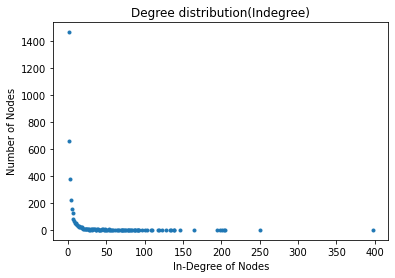

In [17]:
#Plot the indegree and outdegree dictionaries
ind_nodes = list(indegree_dist.keys())           
no_nodes = list(indegree_dist.values())        
plt.plot(ind_nodes, no_nodes, '.')
plt.xlabel("In-Degree of Nodes")
plt.ylabel("Number of Nodes")
plt.title("Degree distribution(Indegree)")
plt.show()

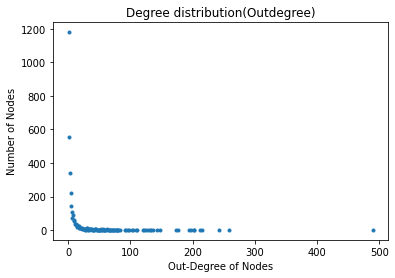

In [18]:
out_nodes = list(outdegree_dist.keys())           
no_nodes = list(outdegree_dist.values())        
plt.plot(out_nodes, no_nodes, '.')
plt.xlabel("Out-Degree of Nodes")
plt.ylabel("Number of Nodes")
plt.title("Degree distribution(Outdegree)")
plt.show()

# **2. Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution of the network.**

In [19]:
#Local cluster contains the local cluster value with respect to the node.
local_cluster=dict()
for k,v in adj_list.items():
  u=k
  count=0
  for i in v:
    for j in v:
      if adj_matrix[i][j]==1:
        count+=1
  try:
    local_cluster[k]=count/(len(v)*(len(v)-1))
  except:
    local_cluster[k]=0

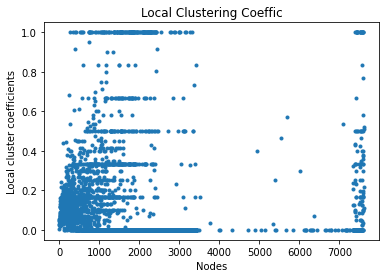

In [20]:
#Plot local cluster coefficients and nodes.
clust_nodes = list(local_cluster.keys())           
local_coeff = list(local_cluster.values())        
plt.plot(clust_nodes, local_coeff, '.')
plt.xlabel("Nodes")
plt.ylabel("Local cluster coefficients")
plt.title("Local Clustering Coeffic")
plt.show()

# **Q2).PageRank, Hubs and Authority**

# **Importing Networkx library**

In [21]:
import networkx as nx
edge_list=list()
for k,v in adj_list.items():
  for u in v:
    edge_list.append((k,u))

# **Adding Edge List**

In [22]:
#DG depicts the di-graph from networkx library
DG = nx.DiGraph()
DG.add_edges_from(edge_list)

# **1. PageRank score for each node**

In [23]:
#Calculating the page rank of each node from networkx library
page_rank=nx.pagerank(DG)
print(page_rank)

{7188: 4.973996708553653e-05, 1: 0.016993099228405292, 430: 0.0002875150716955739, 13: 0.005287958636203423, 59: 0.0010276693707717173, 247: 0.0006621576229530508, 831: 7.690612539660557e-05, 817: 0.0002790004830766625, 1055: 0.00014061348638861603, 7595: 0.001473097666435192, 7509: 0.0002443806109187105, 3134: 0.00011917626603597531, 22: 0.003357845642288716, 27: 0.0026838432296959884, 617: 0.0003350095940140139, 3026: 7.937879011849077e-05, 3010: 7.937879011849077e-05, 804: 0.00034797608896262313, 25: 0.0033669264634527654, 26: 0.003901956613591272, 85: 0.0019991539714934972, 204: 0.0006634020491160464, 7583: 0.0002846346633785031, 1020: 0.00028185740710628347, 160: 0.0004624121679665045, 18: 0.003401812019404002, 57: 0.00261924981319417, 89: 0.0018278969974936344, 294: 0.00034576567589020626, 7579: 0.0003106033763785569, 952: 0.00022188385467847115, 1845: 8.913551038474744e-05, 945: 0.0002752235097001549, 95: 0.0029480420558399742, 3: 0.008960320960927026, 4: 0.008023439583332511, 6

# **2. Authority and Hub score for each node**

In [24]:
#Function to calculate the authority and hub score for each node
def hub_auth(adjacency_matrix,n):

  score_hub = list()
  for i in range(n):
    score_hub.append(1.0)
  score_authority = list()
  for i in range(n):
    score_authority.append(1.0)



  for x in range(5):
    # Calculating the authority scores of the nodes
    for j in range(n):
      temp = 0.0
      for i in range(n):
        if adjacency_matrix[i][j] == 1:
          temp += score_hub[i]
      score_authority[j] = temp
      
    # Normalizing the authority scores
    auth_sum = 0
    for i in score_authority:
      auth_sum+=i
    len_auth_score=len(score_authority)
    for i in range(len_auth_score):
      score_authority[i]=score_authority[i]/ auth_sum
    
    # Calculating the hub scores of the nodes
    for i in range(n):
      temp1 = 0.0
      for j in range(n):
        if adjacency_matrix[i][j] == 1:
          temp1 += score_authority[j]
      score_hub[i] = temp1
      
    # Normalizing the hub scores
    hub_sum =0
    for i in score_hub:
      hub_sum+=i
    hub_len=len(score_hub)
    for i in range(hub_len):
      score_hub[i] /= hub_sum
  temp_list=list(range(n))
  score_authority_dict=dict(zip(temp_list, score_authority))
  score_hub_dict=dict(zip(temp_list, score_hub))
  return score_authority_dict, score_hub_dict
          



In [25]:

authority_scores, hub_scores = hub_auth(adj_matrix,max_ver+1)

In [29]:
authority_scores

{0: 0.0,
 1: 0.005913142042388118,
 2: 0.006821630963434568,
 3: 0.0069506418694932955,
 4: 0.004100634810842911,
 5: 0.005042084309727693,
 6: 0.0048143507383446365,
 7: 0.006059116389506703,
 8: 0.00487705645369715,
 9: 0.0049893672049082394,
 10: 0.0053943450001223865,
 11: 0.007750048585622033,
 12: 0.0038034781999474283,
 13: 0.0029716854058092846,
 14: 0.003200852039980016,
 15: 0.0038883053717769863,
 16: 0.0025094313921898382,
 17: 0.00393593420330712,
 18: 0.0013041452241722687,
 19: 0.0045278396602343625,
 20: 0.002613756501227119,
 21: 0.003936582117150879,
 22: 0.004134851822790258,
 23: 0.000901425587507261,
 24: 0.004951642714613137,
 25: 0.004010784828111824,
 26: 0.005754862498599104,
 27: 0.0031527109434673923,
 28: 0.00043377587813105795,
 29: 0.00456284871869065,
 30: 0.0033522516747809287,
 31: 0.004195545211290603,
 32: 0.003974180042601488,
 33: 0.004125589294072217,
 34: 0.0030506092919019663,
 35: 0.0022207141113889544,
 36: 0.0036159951097485205,
 37: 0.0018149

In [30]:
hub_scores

{0: 0.0,
 1: 0.006400084815508171,
 2: 0.006832303610898456,
 3: 0.0068723520994148,
 4: 0.004695241856618159,
 5: 0.005391830641233988,
 6: 0.005188539971587097,
 7: 0.006693542612702495,
 8: 0.006520697972105772,
 9: 0.0048625059956079126,
 10: 0.006024636117848284,
 11: 0.008534652614884909,
 12: 0.004257009313270154,
 13: 0.0021946922413813154,
 14: 0.0029643020111729157,
 15: 0.004872723722004945,
 16: 0.0026653233475782676,
 17: 0.004458048204834955,
 18: 0.0014529343151714709,
 19: 0.005053520471648773,
 20: 0.0029657071531941546,
 21: 0.004179049846656169,
 22: 0.006133768954445982,
 23: 0.0008262482400261116,
 24: 0.005537399587442798,
 25: 0.004709326244187099,
 26: 0.005886167430037401,
 27: 0.003025966452849369,
 28: 0.0003879168422002393,
 29: 0.003482883139784063,
 30: 0.0053463471064393205,
 31: 0.003277929310937324,
 32: 0.004030523653223686,
 33: 0.005022467165782495,
 34: 0.003110303569382162,
 35: 0.0010314443248484071,
 36: 0.003803045162769145,
 37: 0.0022870884416

# **Plot Page Rank**

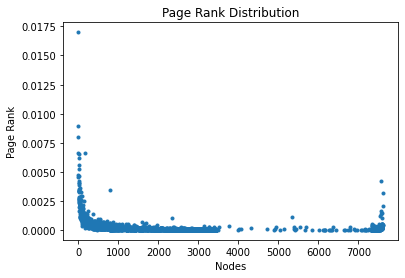

In [26]:
#Plot the Page Rank
nodes = list(page_rank.keys())           
pg_rank = list(page_rank.values())        
plt.plot(nodes, pg_rank, '.')
plt.xlabel("Nodes")
plt.ylabel("Page Rank")
plt.title("Page Rank Distribution")
plt.show()

# **Plot of Authority Score**

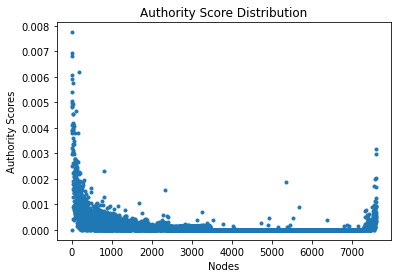

In [27]:
#Plot the Authority Score
nodes = list(authority_scores.keys())           
auth_score = list(authority_scores.values())        
plt.plot(nodes,auth_score, '.')
plt.xlabel("Nodes")
plt.ylabel("Authority Scores")
plt.title("Authority Score Distribution")
plt.show()

# **Plot for Hub Score**

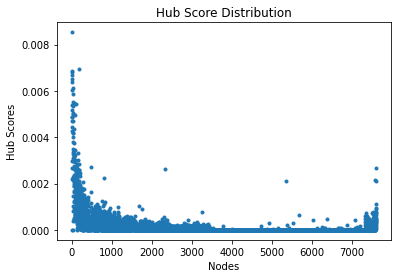

In [28]:
#Plot the Hub Score
nodes = list(hub_scores.keys())           
hub_score = list(hub_scores.values())        
plt.plot(nodes,hub_score, '.')
plt.xlabel("Nodes")
plt.ylabel("Hub Scores")
plt.title("Hub Score Distribution")
plt.show()